DATA PREPOCESSING

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
plt.style.use('fivethirtyeight')

import tensorflow as tf

import seaborn as sns # for plot visualization

In [2]:
# Making the 'Tanggal' coloumn as index
weather_df = pd.read_csv('D:\Coding\Repos\Capstone\Cuaca_Semarang\jan2021_may2023.csv')
# Show the first 5 first data
weather_df.head()

,Tanggal,Tn,Tx,Tavg,RH_avg,RR,ss,ff_x,ddd_x,ff_avg
0,01/01/2021,24.2,30.6,27.2,83.0,3.5,3.0,6,340,2
1,02/01/2021,25.0,30.8,27.6,81.0,3.0,1.4,4,350,2
2,03/01/2021,24.8,31.2,27.3,83.0,NaN,3.2,5,40,2
3,04/01/2021,24.0,31.0,27.7,80.0,1.9,5.8,7,330,2
4,05/01/2021,24.2,30.6,27.4,81.0,8.0,7.4,8,330,3


In [3]:
# Show The shape of the data
weather_df.shape

(879, 10)

In [4]:
# Change column names
weather_df = weather_df.rename(columns={'Tn' : 'temp_min', 
                                        'Tx' : 'temp_max', 
                                        'Tavg' : 'temp_avg', 
                                        'RH_avg' : 'hum_avg', 
                                        'RR' : 'rain_rate', 
                                        'ss' : 'sunshine', 
                                        'ff_x' : 'windspeed_max', 
                                        'ddd_x' : 'winddir_maxspeed', 
                                        'ff_avg' : 'windspeed_avg'
})

weather_df.head()

,Tanggal,temp_min,temp_max,temp_avg,hum_avg,rain_rate,sunshine,windspeed_max,winddir_maxspeed,windspeed_avg
0,01/01/2021,24.2,30.6,27.2,83.0,3.5,3.0,6,340,2
1,02/01/2021,25.0,30.8,27.6,81.0,3.0,1.4,4,350,2
2,03/01/2021,24.8,31.2,27.3,83.0,NaN,3.2,5,40,2
3,04/01/2021,24.0,31.0,27.7,80.0,1.9,5.8,7,330,2
4,05/01/2021,24.2,30.6,27.4,81.0,8.0,7.4,8,330,3


In [5]:
# Return the description of the dataframe
weather_df.describe()

,temp_min,temp_max,temp_avg,hum_avg,rain_rate,sunshine,windspeed_max,winddir_maxspeed,windspeed_avg
count,864.000000,873.000000,866.000000,866.000000,690.000000,876.000000,879.000000,879.000000,879.000000
mean,24.746412,32.242726,27.999654,76.590069,8.376667,6.525000,5.957907,227.847554,2.350398
std,0.912301,1.453585,0.993580,6.893029,16.559780,3.073939,1.469292,123.892072,0.627826
min,21.200000,26.700000,24.000000,48.000000,0.000000,0.000000,2.000000,2.000000,1.000000
25%,24.200000,31.400000,27.400000,72.000000,0.000000,4.500000,5.000000,110.000000,2.000000
50%,24.800000,32.200000,28.100000,77.000000,1.700000,7.000000,6.000000,300.000000,2.000000
75%,25.400000,33.200000,28.700000,81.000000,8.900000,9.000000,7.000000,330.000000,3.000000
max,27.800000,36.400000,31.000000,95.000000,171.000000,11.300000,14.000000,360.000000,5.000000


In [6]:
# Return the short info about weather_df
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 879 entries, 0 to 878
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Tanggal           879 non-null    object 
 1   temp_min          864 non-null    float64
 2   temp_max          873 non-null    float64
 3   temp_avg          866 non-null    float64
 4   hum_avg           866 non-null    float64
 5   rain_rate         690 non-null    float64
 6   sunshine          876 non-null    float64
 7   windspeed_max     879 non-null    int64  
 8   winddir_maxspeed  879 non-null    int64  
 9   windspeed_avg     879 non-null    int64  
dtypes: float64(6), int64(3), object(1)
memory usage: 68.8+ KB


In [7]:
# Check Missing/Null Value
weather_df.isnull().sum()

Tanggal               0
temp_min             15
temp_max              6
temp_avg             13
hum_avg              13
rain_rate           189
sunshine              3
windspeed_max         0
winddir_maxspeed      0
windspeed_avg         0
dtype: int64

We see that there are null or NaN data. We'll fill this data using it's mean for normal-distributed data and using it's median for non normal-distributed data.
To do that, we must know if the data is normal-distributed or not. we'll check that using skewness and kurtosis value. There are 6 columns we need to check, it is temp_min, temp_max, temp_avg, hum_avg, rain_rate, and sunshine column.

Skewness: -0.13121982658740644
Kurtosis: 0.7657231923667194


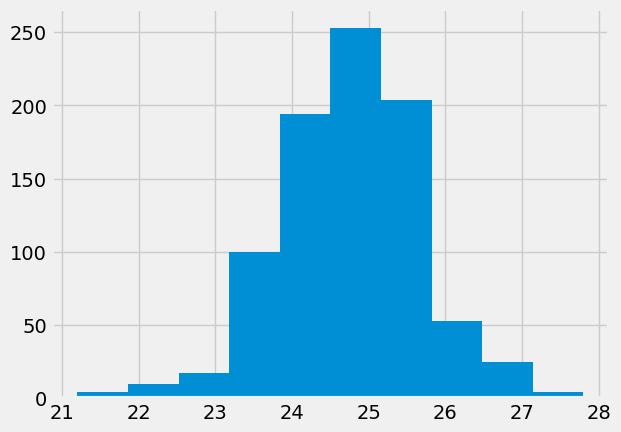

In [8]:
# Show Histogram, skewness, and kurtosis from temp_min
weather_df.temp_min.hist()
print(f"Skewness: {weather_df['temp_min'].skew()}")
print(f"Kurtosis: {weather_df['temp_min'].kurt()}")

Skewness: -0.3629369545031737
Kurtosis: 0.8795576627147383


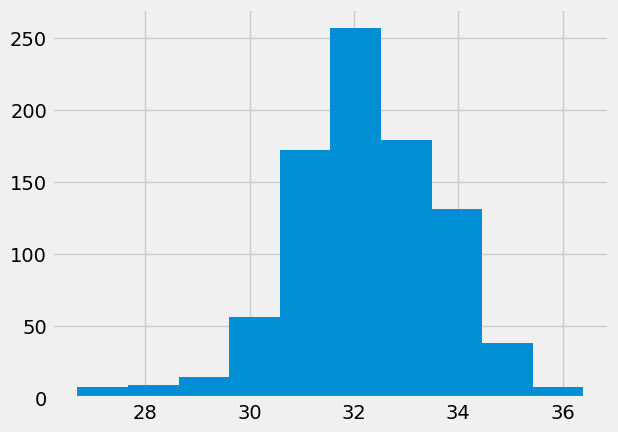

In [9]:
# Show Histogram, skewness, and kurtosis from temp_max
weather_df.temp_max.hist()
print(f"Skewness: {weather_df['temp_max'].skew()}")
print(f"Kurtosis: {weather_df['temp_max'].kurt()}")

Skewness: -0.3382556325703928
Kurtosis: 0.5666287777110441


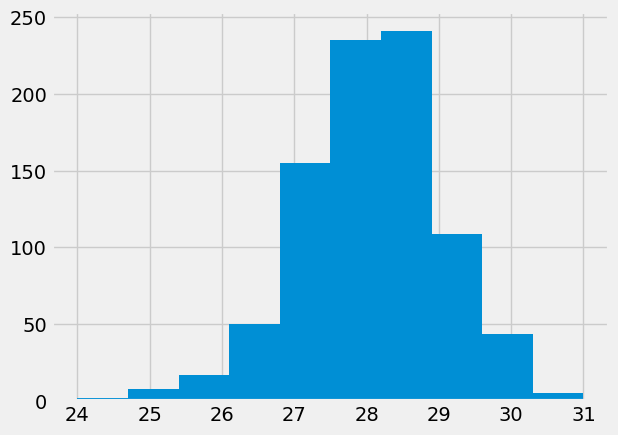

In [10]:
# Show Histogram, skewness, and kurtosis from temp_avg
weather_df.temp_avg.hist()
print(f"Skewness: {weather_df['temp_avg'].skew()}")
print(f"Kurtosis: {weather_df['temp_avg'].kurt()}")

Skewness: -0.43050923557141807
Kurtosis: 0.1994698833902877


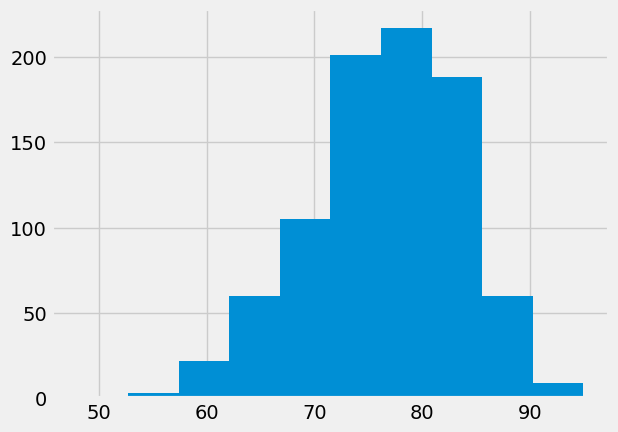

In [11]:
# Show Histogram, skewness, and kurtosis from hum_avg
weather_df.hum_avg.hist()
print(f"Skewness: {weather_df['hum_avg'].skew()}")
print(f"Kurtosis: {weather_df['hum_avg'].kurt()}")

Skewness: 4.081135705345795
Kurtosis: 24.151879500705423


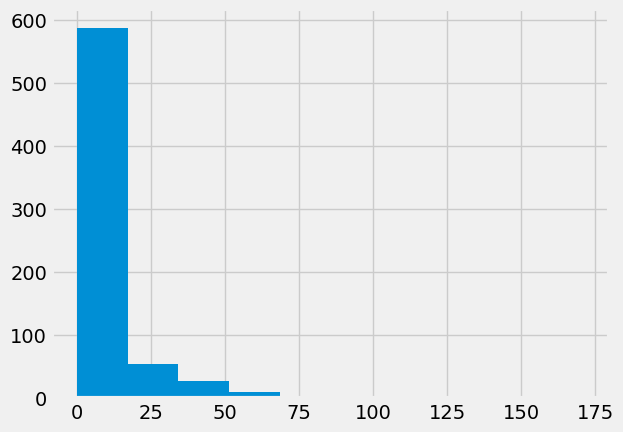

In [12]:
# Show Histogram, skewness, and kurtosis from rain_rate
weather_df.rain_rate.hist()
print(f"Skewness: {weather_df['rain_rate'].skew()}")
print(f"Kurtosis: {weather_df['rain_rate'].kurt()}")

Skewness: -0.5305779653803324
Kurtosis: -0.7263481094216448


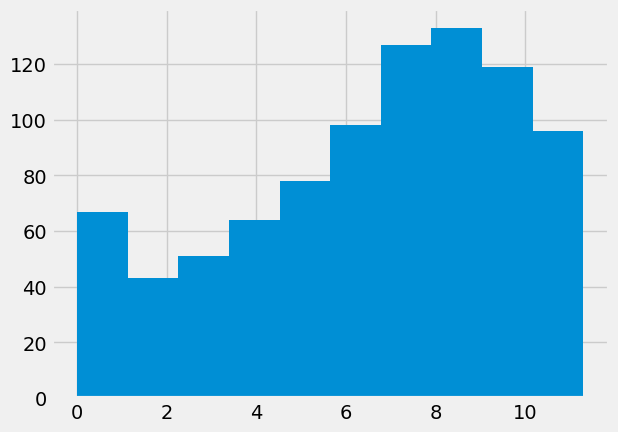

In [13]:
# Show Histogram, skewness, and kurtosis from sunshine
weather_df.sunshine.hist()
print(f"Skewness: {weather_df['sunshine'].skew()}")
print(f"Kurtosis: {weather_df['sunshine'].kurt()}")

From that, we know that only rain_rate and sunshine column that are not normal-distributed. Then we should fill the null or NaN value with mean for temp_min, temp_max, temp_avg, and hum_avg column while we sould fill the null or NaN value with median for rain_rate and sunshine column. 

In [14]:
# Search for mean value for every column with normal distribution
avg_temp_min = np.mean(weather_df.temp_min)
avg_temp_max = np.mean(weather_df.temp_max)
avg_temp_avg = np.mean(weather_df.temp_avg)
avg_hum_avg = np.mean(weather_df.hum_avg)

#Search for median value for non normal distribution column
med_rain_rate = weather_df['rain_rate'].median()
med_sunshine = weather_df['sunshine'].median()

In [15]:
# Replace the null value as mean and median value for the column
weather_df['temp_min'] = weather_df['temp_min'].replace(to_replace = np.nan, value = avg_temp_min)
weather_df['temp_max'] = weather_df['temp_max'].replace(to_replace = np.nan, value = avg_temp_max)
weather_df['temp_avg'] = weather_df['temp_avg'].replace(to_replace = np.nan, value = avg_temp_avg)
weather_df['hum_avg'] = weather_df['hum_avg'].replace(to_replace = np.nan, value = avg_hum_avg)
weather_df['rain_rate'] = weather_df['rain_rate'].replace(to_replace = np.nan, value = med_rain_rate)
weather_df['sunshine'] = weather_df['sunshine'].replace(to_replace = np.nan, value = med_sunshine)

In [16]:
# Check the null value again
weather_df.isnull().sum()

Tanggal             0
temp_min            0
temp_max            0
temp_avg            0
hum_avg             0
rain_rate           0
sunshine            0
windspeed_max       0
winddir_maxspeed    0
windspeed_avg       0
dtype: int64

Now we have all the column free from the null or NaN value. Next we'll try to do forecasting to temp_min column first.

In [17]:
time = np.arange(879, dtype="float32")

In [18]:
def plot_series(time, series, format="-", start=0, end=None):
    plt.plot(time[start:end], series[start:end], format)
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.grid(False)

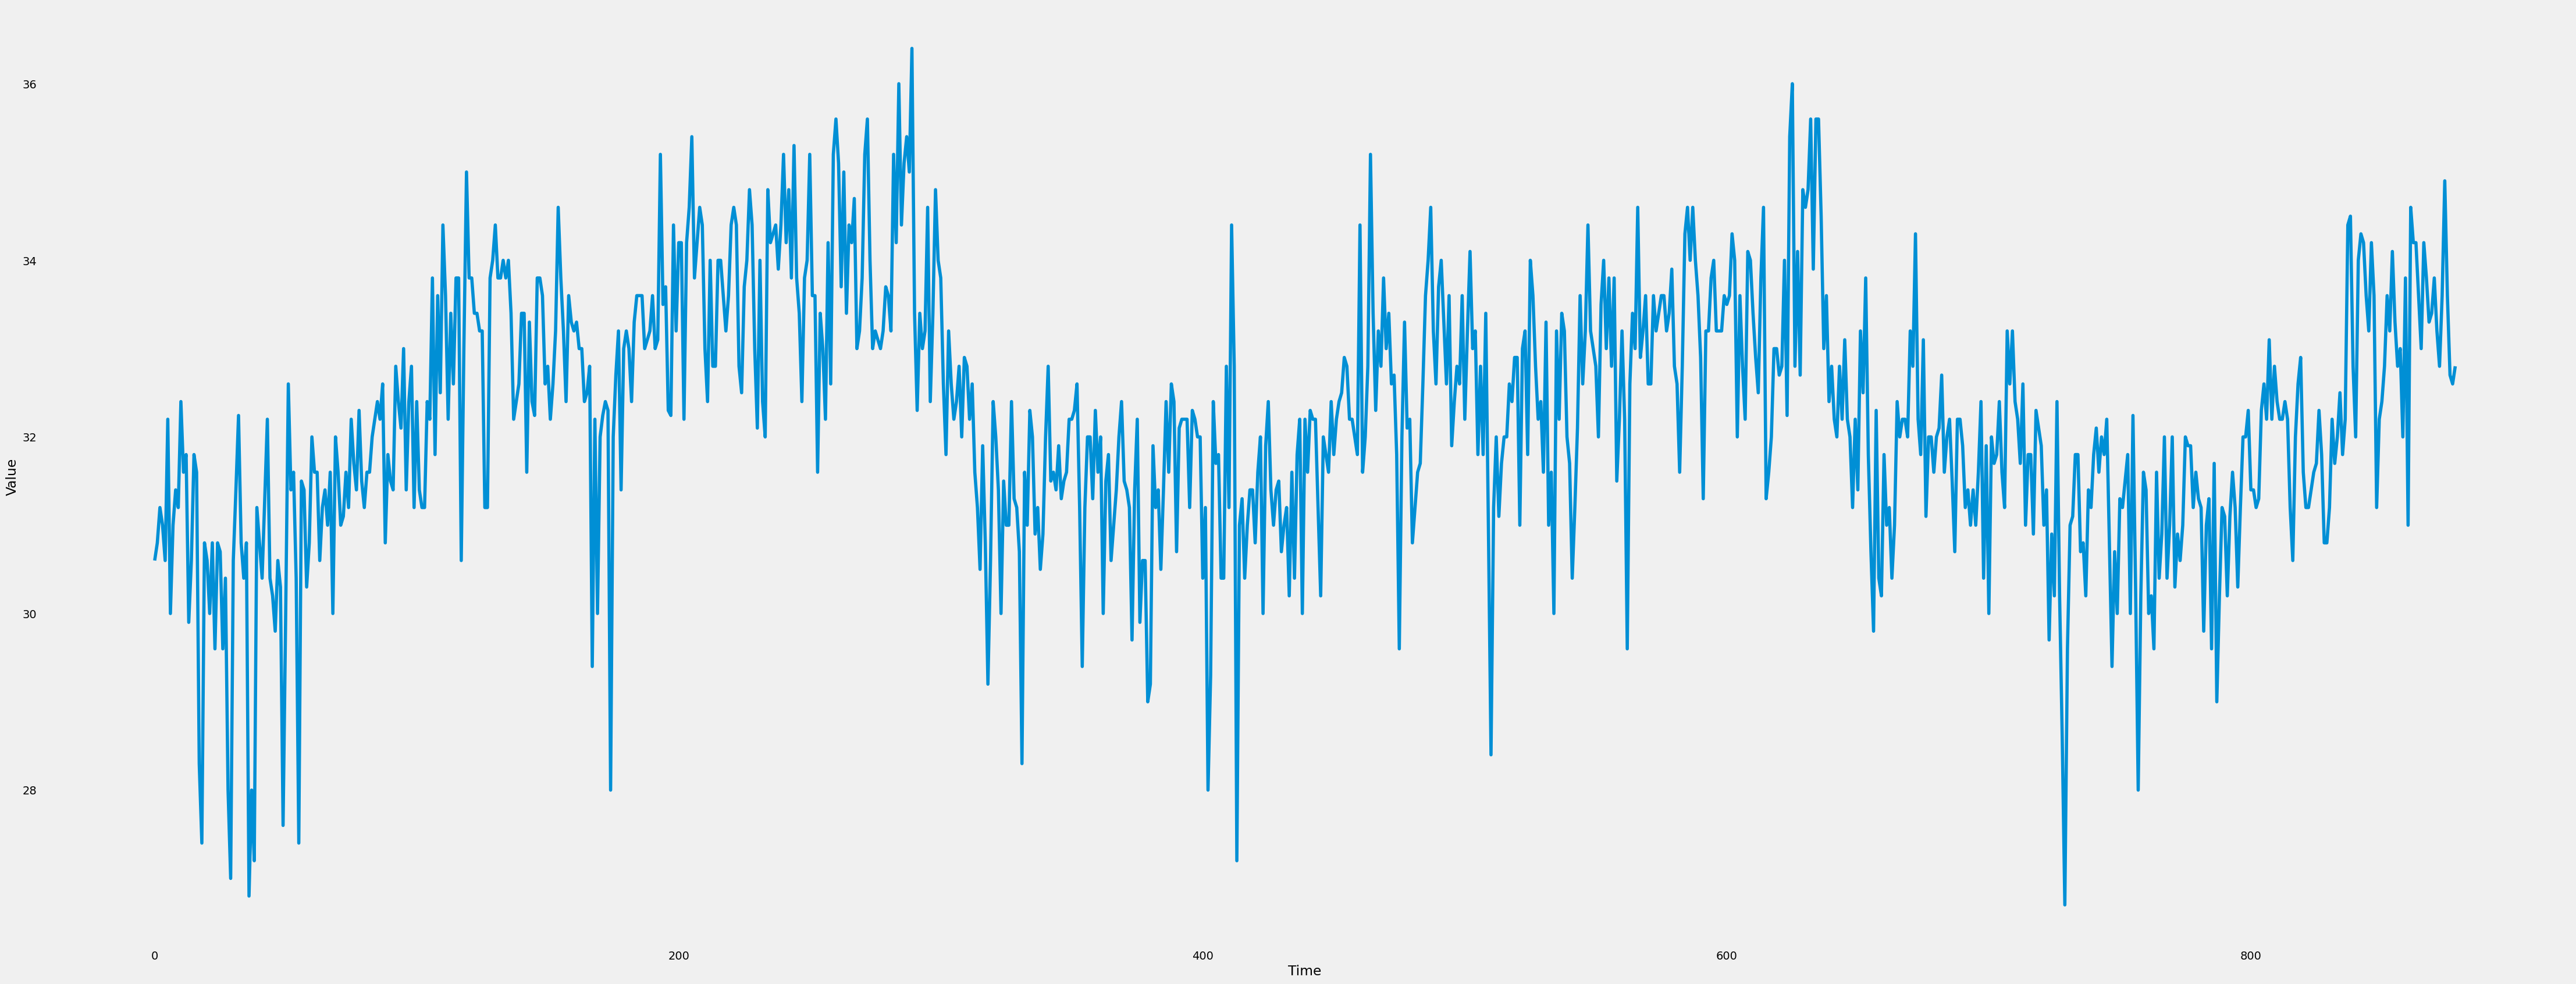

In [19]:
plt.figure(figsize=(50, 20))
plot_series(time, 
            weather_df['temp_max']
)
plt.show()

In [20]:
def train_val_split(time, series, time_step=int(0.85*879)):

    time_train = time[:time_step]
    series_train = series[:time_step]
    time_valid = time[time_step:]
    series_valid = series[time_step:]

    return time_train, series_train, time_valid, series_valid

In [21]:
time_train, series_train, time_valid, series_valid = train_val_split(time, weather_df['temp_max'])

In [22]:
print(time_train.shape)
print(series_train.shape)
print(time_valid.shape)
print(series_valid.shape)

(747,)
(747,)
(132,)
(132,)


In [23]:
def windowed_dataset(series, window_size= 10, batch_size=32, shuffle_buffer=1000):
    dataset = tf.data.Dataset.from_tensor_slices(series)
    dataset = dataset.window(window_size + 1, shift=1, drop_remainder=True)
    dataset = dataset.flat_map(lambda window: window.batch(window_size + 1))
    dataset = dataset.shuffle(shuffle_buffer)
    dataset = dataset.map(lambda window: (window[:-1], window[-1]))
    dataset = dataset.batch(batch_size).prefetch(1)
    return dataset

In [24]:
dataset = windowed_dataset(series_train)

In [116]:
tf.keras.backend.clear_session()

In [117]:

def uncompiled_model():

    model = tf.keras.models.Sequential([
      tf.keras.layers.Conv1D(filters=64, kernel_size=5,
                      strides=1, padding="causal",
                      activation="relu",
                      input_shape=[None, 1]),
      #tf.keras.layers.Conv1D(filters=64, kernel_size=5,
       #               strides=1, padding="causal",
       #               activation="relu"),
      #tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(256, return_sequences=True)),
      tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(2048)),
      #tf.keras.layers.Dense(128, activation="relu"),
      #tf.keras.layers.Dense(256, activation="relu"),
      tf.keras.layers.Dense(128, activation="relu"),
      tf.keras.layers.Dense(1, activation="linear"),
      tf.keras.layers.Lambda(lambda x: x * 150.0)
    ])
    
    return model

In [118]:
model = uncompiled_model()

In [119]:

optimizer = tf.keras.optimizers.SGD(learning_rate=1e-7, momentum=0.9)


model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer, 
              metrics=["mae"]
) 

In [120]:
history = model.fit(dataset, epochs=30)

Epoch 1/30
24/24 [==============================] - 70s 3s/step - loss: 35.6540 - mae: 36.1469
Epoch 2/30
24/24 [==============================] - 65s 3s/step - loss: 5.9050 - mae: 6.3983
Epoch 3/30
24/24 [==============================] - 66s 3s/step - loss: 1.1367 - mae: 1.5770
Epoch 4/30
24/24 [==============================] - 67s 3s/step - loss: 0.6484 - mae: 1.0453
Epoch 5/30
24/24 [==============================] - 63s 3s/step - loss: 0.7056 - mae: 1.1118
Epoch 6/30
24/24 [==============================] - 67s 3s/step - loss: 0.7052 - mae: 1.1066
Epoch 7/30
24/24 [==============================] - 69s 3s/step - loss: 0.7099 - mae: 1.1214
Epoch 8/30
24/24 [==============================] - 69s 3s/step - loss: 1.1095 - mae: 1.5509
Epoch 9/30
24/24 [==============================] - 69s 3s/step - loss: 0.8245 - mae: 1.2503
Epoch 10/30
24/24 [==============================] - 70s 3s/step - loss: 0.7523 - mae: 1.1566
Epoch 11/30
24/24 [==============================] - 73s 3s/step - 

In [121]:
def model_forecast(model, series, window_size):
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size))
    ds = ds.batch(32).prefetch(1)
    forecast = model.predict(ds)
    return forecast

27/27 [==============================] - 30s 1s/step


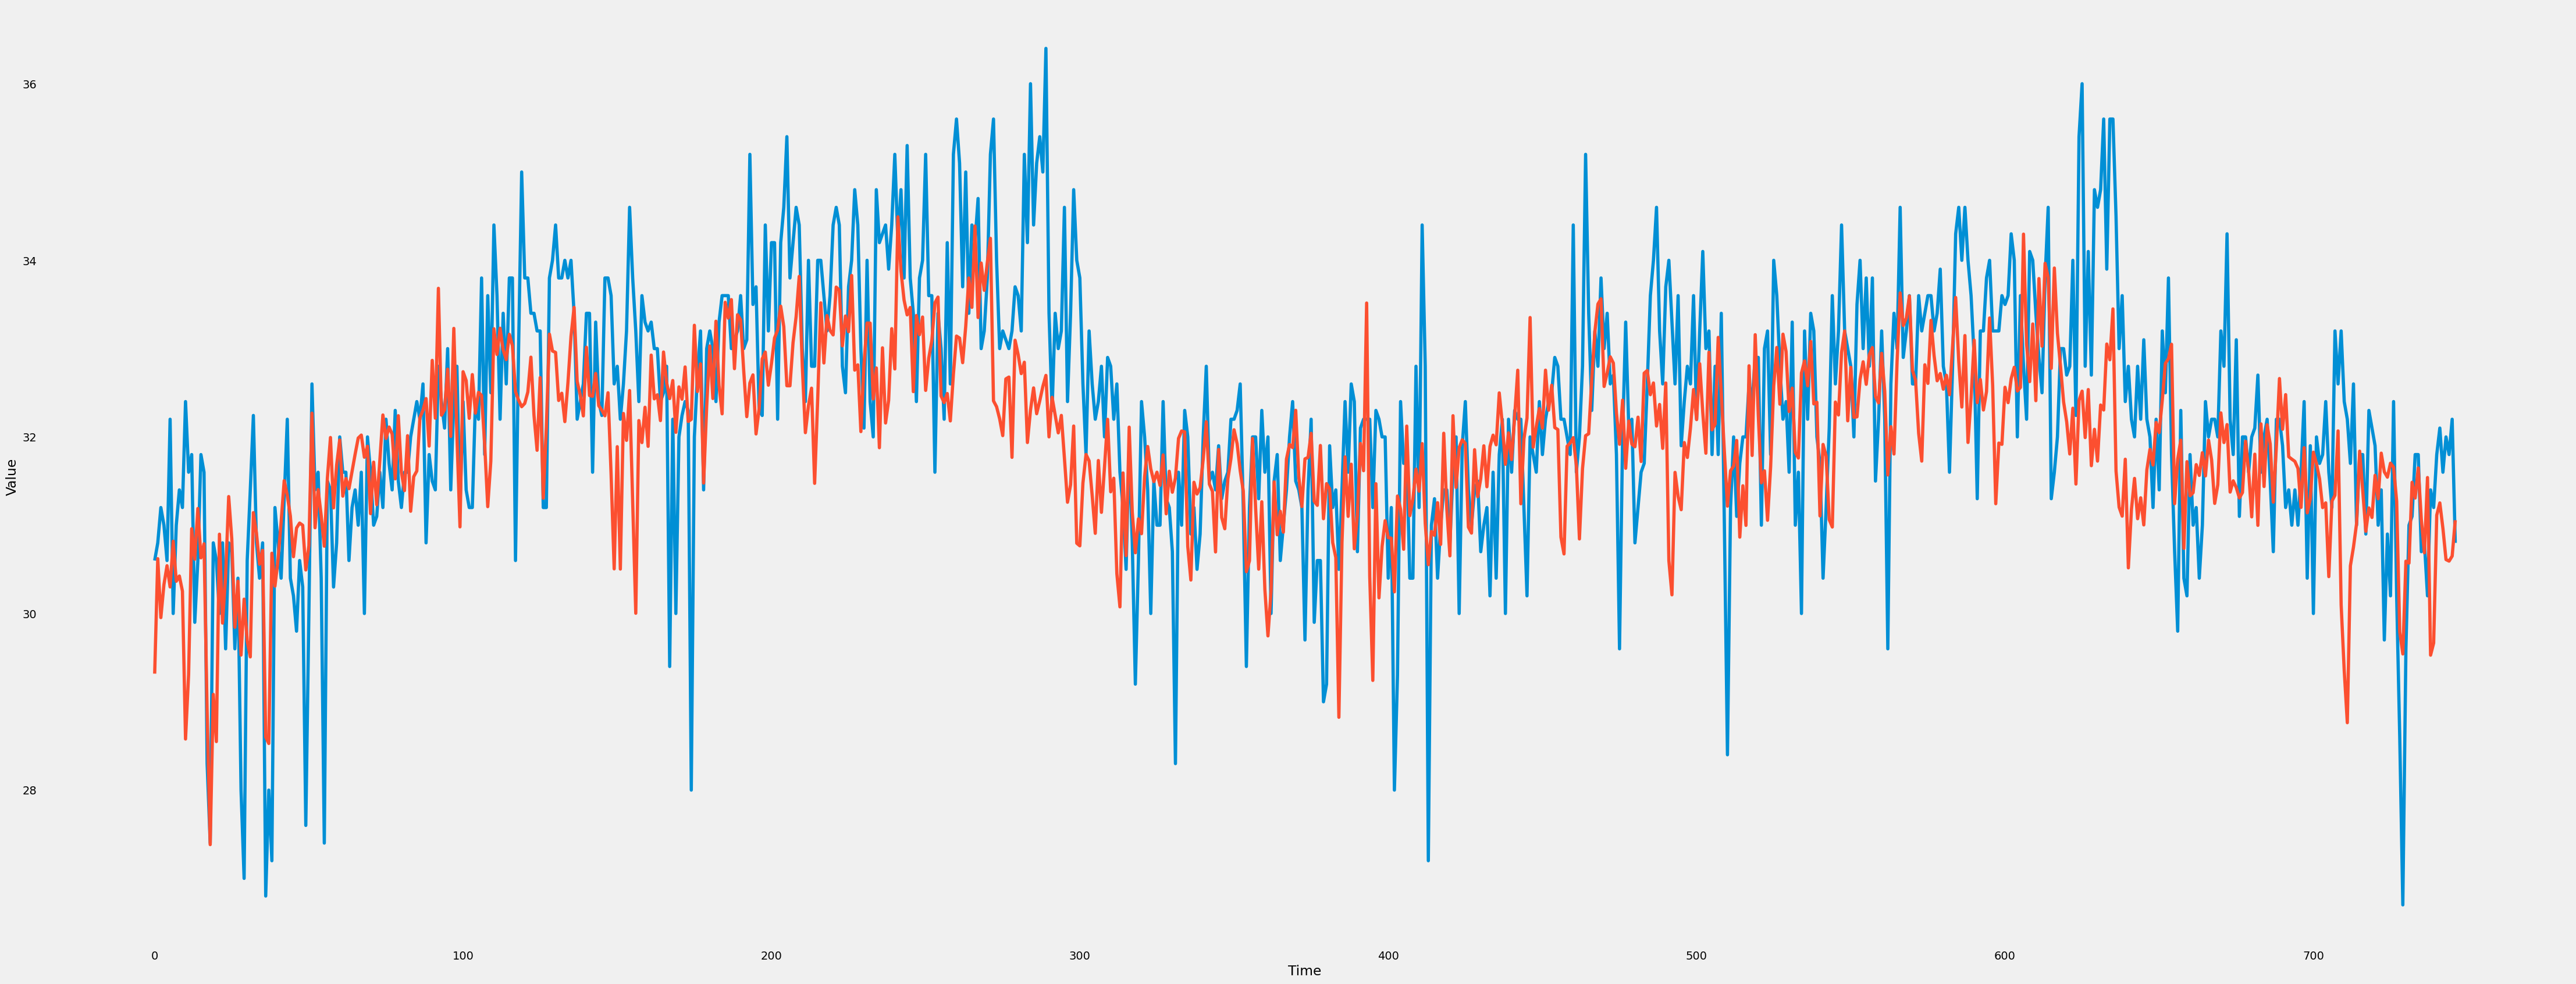

In [122]:
# Compute the forecast for all the series
rnn_forecast = model_forecast(model, weather_df['temp_max'], 20).squeeze()

# Slice the forecast to get only the predictions for the validation set
rnn_forecast = rnn_forecast[: int(0.85*879)]

# Plot it
plt.figure(figsize=(50, 20))

plot_series(time_train, series_train)
plot_series(time_train, rnn_forecast)

27/27 [==============================] - 29s 1s/step


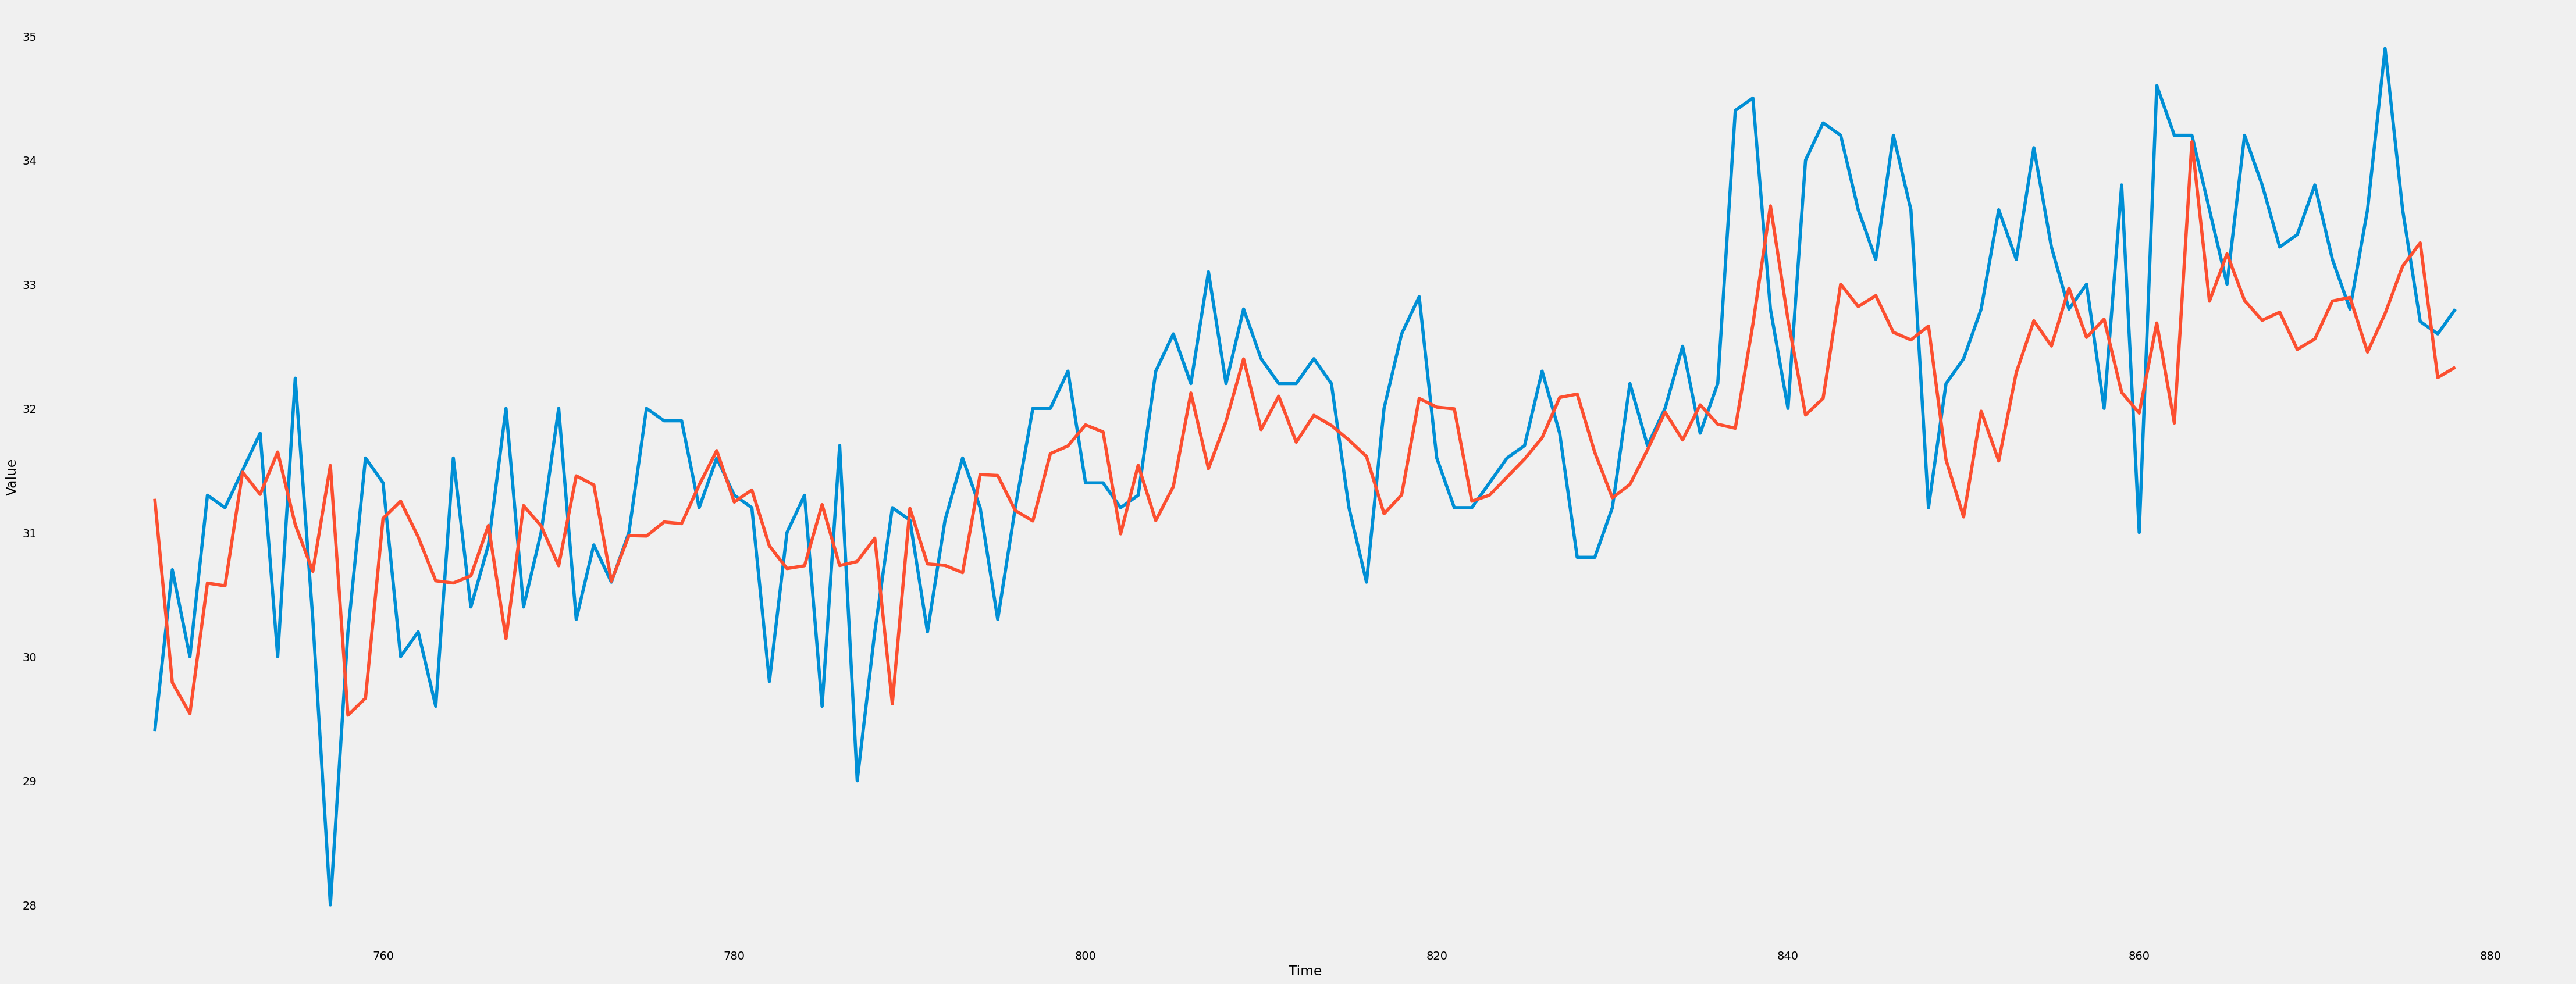

In [123]:
# Compute the forecast for all the series
rnn_forecast = model_forecast(model, weather_df['temp_max'], 20).squeeze()

# Slice the forecast to get only the predictions for the validation set
rnn_forecast = rnn_forecast[int(0.85*879) - 20:-1]

# Plot it
plt.figure(figsize=(50, 20))

plot_series(time_valid, series_valid)
plot_series(time_valid, rnn_forecast)